# PROJECT

##Import all relevant libraries here

In [1]:
#0. import all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import accuracy_score


## Import dataset


The dataset has been uploaded to Google drive and the link is


In [4]:
#1. import google drive into colab
#from google.colab import drive
#2. mount the drive
#drive.mount('/content/drive')
#3. read the dataset (in CSV format) into a python dataframe using pandas
df =pd.read_csv('CSC311MLUSL_DATASET.csv')
#4. preview the data
df.head(10)

,Area,Perimeter,Compactness,Length,Width,Asymmetry,kernel_len,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


## Separate X and Y
## let Y be the label and X all other columns

<AxesSubplot:xlabel='Area', ylabel='Perimeter'>

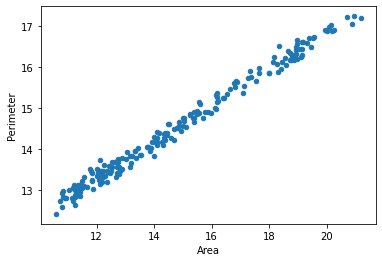

In [8]:
X = df.loc[:,df.columns!='class']
Y= df.loc[:,df.columns =='class']
Y=Y.replace(1,0)
Y=Y.replace(2,1)
Y=Y.replace(3,2)
#print(Y)

#plot Area vs Perimeter 
df.plot.scatter(x='Area',y='Perimeter',s=20)



## KMeans

Text(0, 0.5, 'inertia')

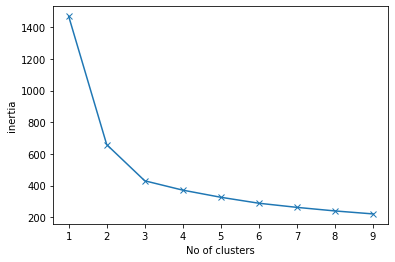

In [6]:
#scale your data
scaler= StandardScaler()
df2_scaled = scaler.fit_transform(X)
#print(X.head(10))
#print(df2_scaled)
#plot an Elbow graph using 10 iterations
tempOG = []#store tepm
for c in range(1,10):
    km = KMeans(n_clusters = c, init = 'k-means++')
    km.fit(df2_scaled)
    tempOG.append(km.inertia_)
#plot Inertia vs number of clusters 
plt.plot([1,2,3,4,5,6,7,8,9],tempOG,marker = 'x')
plt.xlabel('No of clusters')
plt.ylabel('inertia')




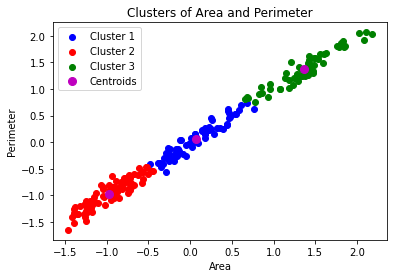

In [9]:
#cluster the dataset using k = 3
km = KMeans(n_clusters = 3)
df2_scaled = scaler.fit_transform(X)#df2_scaledAP is Area V Perimeter
labelsog = km.fit_predict(df2_scaledAP) #df2_scaledAP is Area V Perimeter
centroid = km.cluster_centers_ 
cluster1 = df2_scaled[labelsog ==0]
cluster2 = df2_scaled[labelsog ==1]
cluster3 = df2_scaled[labelsog ==2]


 
#plot the results of Area and Perimeter
plt.scatter(cluster1[:,0],cluster1[:,1],color = 'blue',label = 'Cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1],color = 'red',label = 'Cluster 2')
plt.scatter(cluster3[:,0],cluster3[:,1],color = 'green',label = 'Cluster 3')
plt.title('Clusters of Area and Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.plot(centroid[:,0],centroid[:,1],'mo',markersize=8,label ='Centroids')
plt.legend()
#show the 3 clusters and their centroids




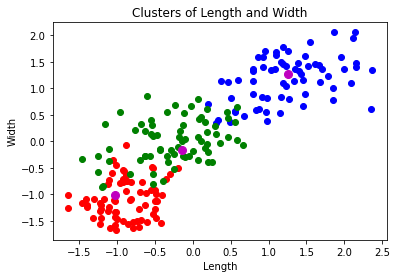

In [11]:
#plot the results of Length and Width
km = KMeans(n_clusters = 3)
df2_scaled = scaler.fit_transform(X)
labels = km.fit_predict(df2_scaled)
centroid = km.cluster_centers_
cluster1 = df2_scaled[labels ==0]
cluster2 = df2_scaled[labels ==1]
cluster3 = df2_scaled[labels ==2]

#plot the results of Length and Width

plt.scatter(cluster1[:,3],cluster1[:,4],color = 'blue',label = 'Cluster 1')
plt.scatter(cluster2[:,3],cluster2[:,4],color = 'red',label = 'Cluster 2')
plt.scatter(cluster3[:,3],cluster3[:,4],color = 'green',label = 'Cluster 3')
plt.title('Clusters of Length and Width')
plt.xlabel('Length')
plt.ylabel('Width')
#show the 3 clusters and their centroids

plt.plot(centroid[:,0],centroid[:,1],'mo',markersize=8,label ='Centroids')

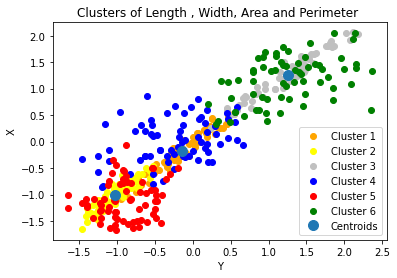

In [12]:
#Now lets cluster the dataset using the number of k you select from the Elbow method above
 
#plot the results of Area and Perimeter 
km = KMeans(n_clusters = 3)
labels = km.fit_predict(df2_scaled) 
centroid = km.cluster_centers_ 
cluster1 = df2_scaled[labels ==0]
cluster2 = df2_scaled[labels ==1]
cluster3 = df2_scaled[labels ==2]
plt.scatter(cluster1[:,0],cluster1[:,1],color = 'orange',label = 'Cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1],color = 'yellow',label = 'Cluster 2')
plt.scatter(cluster3[:,0],cluster3[:,1],color = 'silver',label = 'Cluster 3')



##plot the results of Length and Width 
plt.scatter(cluster1[:,3],cluster1[:,4],color = 'blue',label = 'Cluster 4')
plt.scatter(cluster2[:,3],cluster2[:,4],color = 'red',label = 'Cluster 5')
plt.scatter(cluster3[:,3],cluster3[:,4],color = 'green',label = 'Cluster 6')
plt.plot(centroid[:,0],centroid[:,1],'o',markersize=10,label ='Centroids')
plt.title('Clusters of Length , Width, Area and Perimeter ')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()


### Calculate Accuracies of KMeans

In [14]:
#compare accucies of both clustering i.e. k = 3 vs k = your choice
print("Accuracy = " , accuracy_score(Y,labelsog)*100)
acckmeans = accuracy_score(Y,labelsog)*100

Accuracy =  25.71428571428571


In [15]:
#Question 3

##AHC

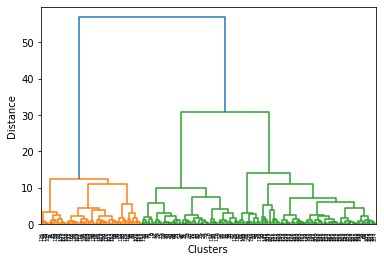

In [16]:
#Plot Dendrogram to determin the number of clusters
#X.head()

df2_scaled = scaler.fit_transform(X)#Reinitialize so var
sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.ylabel("Distance")
plt.xlabel("Clusters")
plt.show()



In [17]:
#Perform AHC clustering with number of clusters found in the dendrogram 
ahc = AgglomerativeClustering(n_clusters =3,affinity = 'euclidean',linkage = 'ward')
y= ahc.fit_predict(X)

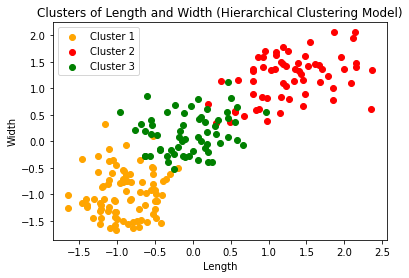

In [18]:
#plot scatter plots from B2, for Lenght and width, including cluster centroids

plt.scatter(df2_scaled[y==0,3],df2_scaled[y==0,4],color = 'orange',label = 'Cluster 1')
plt.scatter(df2_scaled[y==1,3],df2_scaled[y==1,4],color = 'red',label = 'Cluster 2')
plt.scatter(df2_scaled[y==2,3],df2_scaled[y==2,4],color = 'green',label = 'Cluster 3')
plt.title('Clusters of Length and Width (Hierarchical Clustering Model)')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


In [19]:
#check accuracy
print("Accuracy = " , accuracy_score(Y,y)*100)
accAHC = accuracy_score(Y,y)*100

Accuracy =  37.61904761904762


## KNN

In [20]:
#cluster the dataset using KNN and k = 3
df2_scaled = scaler.fit_transform(X)#Reinitialize so var
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df2_scaled,Y.values.ravel())
y = knn.predict(df2_scaled)


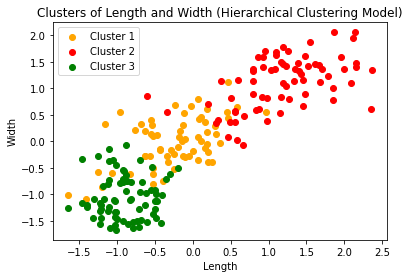

In [21]:
#Plot a scatter plot for "Lenght" and "Width" clusters
plt.scatter(df2_scaled[y==0,3],df2_scaled[y==0,4],color = 'orange',label = 'Cluster 1')
plt.scatter(df2_scaled[y==1,3],df2_scaled[y==1,4],color = 'red',label = 'Cluster 2')
plt.scatter(df2_scaled[y==2,3],df2_scaled[y==2,4],color = 'green',label = 'Cluster 3')
plt.title('Clusters of Length and Width (Hierarchical Clustering Model)')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()



In [22]:
#Results - compare prediction results with known values of Y

print("Accuracy = " , accuracy_score(Y,y)*100)
accKNN = accuracy_score(Y,y)*100

Accuracy =  97.61904761904762


Text(0, 0.5, 'Percentage of Accuracy(%)')

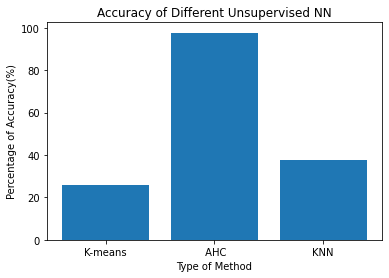

In [23]:
#draw a confusion matrix of KNN
acckmeans
accKNN
accAHC
objects = ('K-means',' AHC','KNN')
performance = [acckmeans,accKNN,accAHC]
plt.bar(objects, performance, align='center')
plt.title('Accuracy of Different Unsupervised NN')
plt.xlabel('Type of Method')
plt.ylabel('Percentage of Accuracy(%)')